# Predicting Breast Cancer using Machine Learning methodology.

This project is conducted as a part of the assignment for the course IMSE 514 - Multivariate Statistics at the University of Michigan - Dearborn.
This is project work and code is written by Abhijit Padhi.

Breast  Cancer  Research center Researcher  computed 30 features using the  digitized image of a fine needle aspirate (FNA) of a breast  mass.  They describe characteristics of the cell nuclei present in the image. Ten real-valued features are computed for each cell nucleus:<br>  
a) **radius**(mean  of  distances  from  center  to  points  on  the perimeter)<br>
b) **texture** (standard deviation of gray-scale values)<br>
c) **perimeter**<br>
d) **area**<br>
e) **smoothness** (local variation in radius lengths)<br>
f) **compactness** (perimeter^2 / area - 1.0)<br>
g) **concavity** (severity of concave portions of the contour)<br>
h) **concave points** (number of concave portions of the contour)<br>
i) **symmetry**<br>
j) **fractal dimension** ("coastline approximation" - 1)<br>

The  mean,  standard  error,  and  "worst"  or  largest  (mean  of  the three  largest  values)  of  these  features  were  computed  for  each image,  resulting  in  30  features.    For  instance,  field  3  is  Mean Radius (RediusM),  field  13  is  Radius  SE (RediusSE),  field  23  is Worst  Radius (RediusW).  All  feature  values  are  recoded  with  four significant digits. 

***The idea is to conduct analysis and construct the prediction model for the diagnosis of B = Benign, M = Malignant.***

# Introduction:

Breast cancer is a majorly diagnosed cancers among women worldwide. There have been numerous cases of breast cancer and deaths occured due to same till date and it is now considered registed till date. Today this is considered as a major public health problem.

The early diagnosis of breast cancer can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Classification of Benign and Malignant tumors can prevent patients undegoing painful treatments on a longer run. Thus, to predict such kind of problems Machine Learning methodology is widely used for classification and create forecat models by analysing complex datasets.

# Data Exploration

We imported the libraries for preprocessing of the code to build the Predictive Models.<br>
**Numpy** is used conduct mathematical analysis.<br>
**Matplotlib** and **Seaborn** was used to generate graphs and maps for visualization.<br>
**Pandas** was used to read the file and conduct further operations on the dataset.<br> 
**Sklearn** was used for label-encoding and creating the predictive models to train and test the dataset.

In [34]:
#Importing library.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Further the dataset was read by using the **pandas** library and displaying first few rows of the datasets.

In [50]:
#Reading the dataset.
data = pd.read_csv('Breast Cancer.csv')
X = data.iloc[:, 2:31].values
Y = data.iloc[:, 1].values

In [100]:
#Dimension of the dataset.
print("Dimension of the dataset = {}".format(data.shape))
data.head(10)

Dimension of the dataset = (569, 32)


,ID,Diagnosis,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


We observe that the dataset contain 569 rows and 32 columns. We consider that in the following dataset there are no predictive variables. Hence, we can easily divide dataset into two major categories Benign and Malignant. 

*Note: In the Diagnosis column M and B stands for Malignant and Benign respectively.*

In [103]:
data.groupby('Diagnosis').size()

Diagnosis
B    357
M    212
dtype: int64

In [102]:
#Total number of Malignant and Benign.
print('Number of Malignant = {}'.format(data[data.Diagnosis == 'M'].shape[0]))
print('Number of Benign = {}'.format(data[data.Diagnosis == 'B'].shape[0]))

Number of Malignant = 212
Number of Benign = 357


It was found that amongst the 569 datapoints in the dataset, 212 were Malignants cases and 357 were Benign cases.

In [104]:
#Finding Correlation.
data.corr()

,ID,RadiusM,TextureM,PerimeterM,AreaM,SmoothnessM,CompactnessM,ConcavityM,ConcavePointsM,SymmetryM,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,ConcavePointsW,SymmetryW,FdimensionW
ID,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
RadiusM,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
TextureM,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
PerimeterM,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
AreaM,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
SmoothnessM,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
CompactnessM,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
ConcavityM,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
ConcavePointsM,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
SymmetryM,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


The Above table shows the correlation of all the columns with each other within the dataset. Further, visualization of the correlation matrix was created.

Diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

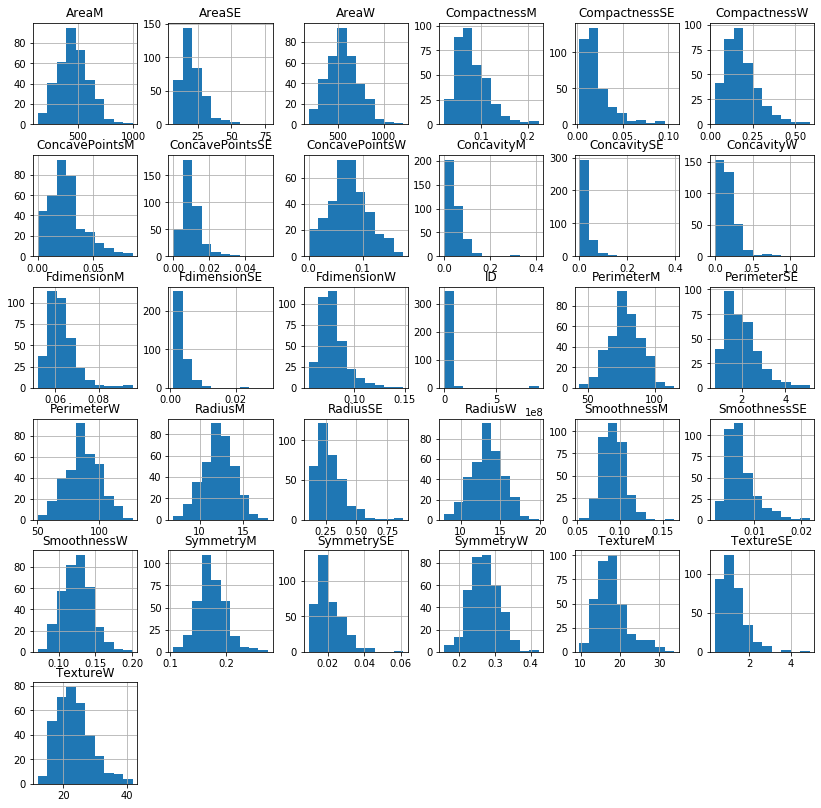

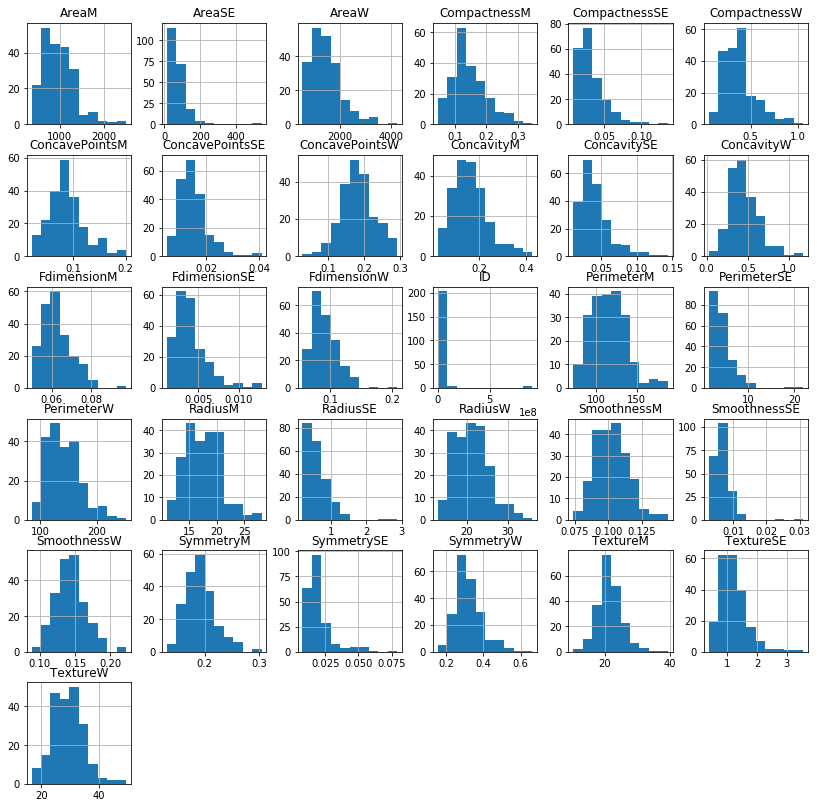

In [39]:
#Visualizing the data in histogram to show correlation between variables.
data.groupby('Diagnosis').hist(figsize=(14, 14))

The above chart depicts the correlation of the columns with each other in a form of histogram.

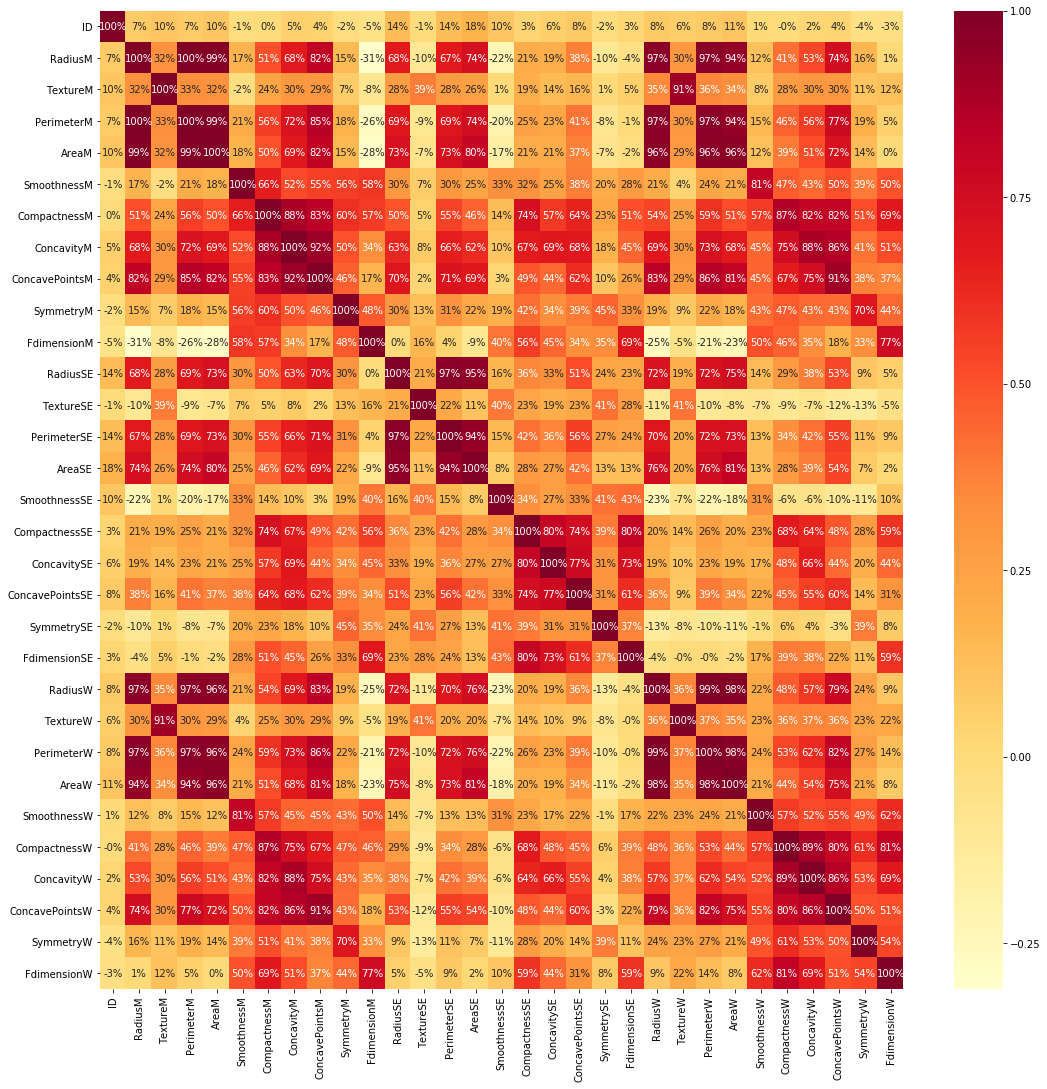

In [86]:
#Creating heatmap to show correlation between the variables.
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot = True, fmt = '.0%', cmap="YlOrRd")

The above heatmap depicts the correlation of data in the dataset.

By the following heatmap we determine that there is alot of correlation among the predictors. The heatmaps show pairwise columns with highest correlation and lowest correlation. Highest correlations are shown in red color and lowest correaltions between two columns are shown in yellow color.

# Categorical Data

From the dataframe created in the above lines we could see the Diagnosis column has variables which are labels. This could further affect the model if it is not changed. Hence, we use Encoding function which was imported from **SciKit Learn** library. <br>
Encoding function changes the strings into numbers i.e. 0 & 1. 

In [54]:
#Encoding categorical data values.
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

The following steps was to divide the dataset into training data and testing data. The training data contains a known output and the model learns on this data in order to train the other data. We have the test data in order to test our model’s prediction.<br>
We used SciKit-Learn library to train_test_split method.

In [55]:
#Splitting dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

We will have training data of 75% and testing data of 25%.

# Scaling the Dataset

Some data in the dataset will contain with varying magnitutes. we need to bring all the data to the same level of magnitudes. This could be achieved by scaling. Here the data is transformed to fit within a specific scale.

In [57]:
#Scaling data to bring all feature to same magnitude.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Model Selection

A Supervised learning is a system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. <br>

In our dataset we have the outcome variable (Dependent variable) Y which has two set of values i.e. M (Malignant) ands B(Benign). So we will use Classification algorithm of supervised learning for this dataset to create our predictive models.<br>

We will use Logistic Regression and Random Forest Classification which would imported from **SciKit Learn** library.

In [117]:
#Function to hold the models for classification.
def predictive_model(X_train, Y_train):
    #Model for Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    print('Logistic Regression Training Accuracy: {} %'.format(log.score(X_train, Y_train)*100))
    
    #Model for Random Forest
    from sklearn.ensemble import RandomForestClassifier
    r_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    r_forest.fit(X_train, Y_train)
    print('Random Forest Classifier Training Accuracy: {} %'.format(r_forest.score(X_train, Y_train)*100))
    return log, r_forest

In [118]:
#Printing the accuracy of the model.
model = predictive_model(X_train, Y_train)

Logistic Regression Training Accuracy: 99.06103286384976 %
Random Forest Classifier Training Accuracy: 99.53051643192488 %


/Users/abhijitpadhi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Above we created predictive models to train the X and Y variables by both Logistic Regression and Random Forest Classification. Further after training the 75% training dataset, the accuracy of the training dataset of Logistic Regression model was found to be 99.06% and the accuracy of the training dataset of the Random Forest Classification model was found to be 99.53%.

The next step was to test the remaining 25% testing dataset. For this we created the confusion matrix. The confusion matrix takes in the predictive model and test dataset to conduct the test. 
The confusion matrix identifies the True Negative (TN), True Positive (TP), False Negative (FN) and False Positive (FP) and based on this the accuracy of the test data is concluded.

In [121]:
#Finding classification accuracy & other metrics.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    con_mat = confusion_matrix(Y_test, model[i].predict(X_test))
    TN = con_mat[0][0]
    TP = con_mat[1][1]
    FN = con_mat[1][0]
    FP = con_mat[0][1]
    print(con_mat)
    print('Model[{}] Testing Accuracy = {} %'.format(i,  (TP + TN) / (TP + TN + FN + FP)*100))
    print()

[[86  4]
 [ 4 49]]
Model[0] Testing Accuracy = 94.4055944055944 %

[[87  3]
 [ 2 51]]
Model[1] Testing Accuracy = 96.5034965034965 %



Here the accuracy of the testing dataset of Logistic Regression was found to be 94.40% and the accuracy of the testing dataset of Random Forest Classification was found to be 96.50%.

# Conclusion

From the above analysis result it could be concluded that the Random Forest Classification was found to better on accuracy level to predict Breast Cancer from the available dataset.